<a href="https://colab.research.google.com/github/wherediddavidgo/multitemporal_RSSA/blob/main/rwc_gage_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:


# !pip install netCDF4
import xarray as xr
# from netCDF4 import Dataset
import numpy as np
import pandas as pd
import geopandas as gpd
from google.colab import drive
from matplotlib import pyplot as plt
import datetime

import glob

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cb_centerlines = gpd.read_file('/content/drive/MyDrive/river_tinder_assets/centerlines/s2_platte_centerlines_4326.shp').to_crs(3857)
merit_centerlines = gpd.read_file('/content/drive/MyDrive/MERIT/riv_pfaf_7_MERIT_Hydro_v07_Basins_v01_bugfix1.shp').to_crs(3857)

In [ ]:
Qarray = xr.open_dataset('/content/drive/MyDrive/grades_Q/GRADES-hydroDL_V2.0_pfaf_07_2024.nc')

In [71]:
rwc_dfs = []

files = glob.glob('/content/drive/MyDrive/all_rwc_exports/*.csv')

for f in files:
    rwc_dfs.append(pd.read_csv(f))

rwc_df = pd.concat(rwc_dfs)

In [73]:
rwc_gdf = gpd.GeoDataFrame(rwc_df, geometry=gpd.points_from_xy(rwc_df.x, rwc_df.y, crs=4326))
rwc_gdf.scene_date = pd.to_datetime(rwc_gdf.scene_date, format='ISO8601')

In [84]:
TDF = rwc_gdf.loc[rwc_gdf.scene_date <= datetime.datetime(2018, 12, 31)]

In [98]:
mwidths = TDF.groupby('geometry')['width'].agg('mean').reset_index()

In [99]:
mwidths = mwidths.loc[mwidths.width > 0]

In [100]:
mwidths['logw'] = np.log(mwidths.width)

<Axes: >

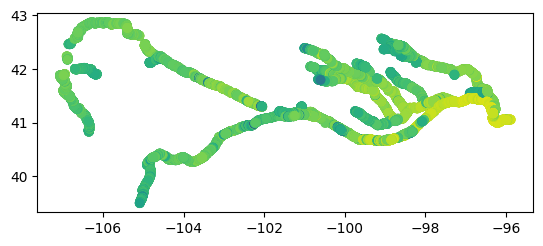

In [101]:
mwidths = gpd.GeoDataFrame(mwidths, geometry='geometry')
mwidths.plot(column='logw')